<a href="https://colab.research.google.com/github/saikirankesoju/Data-Mining/blob/main/lab-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

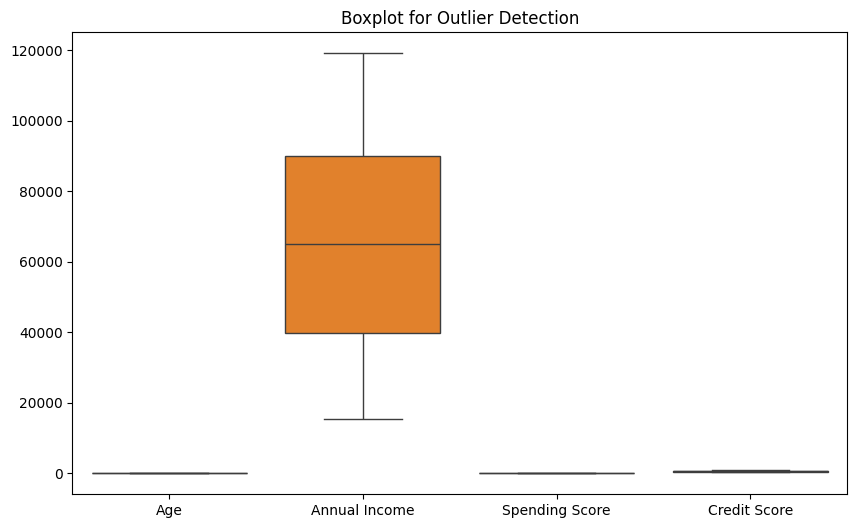

<ipython-input-5-ab6901774f2c>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] < lower_bound[col], col] = lower_bound[col]
<ipython-input-5-ab6901774f2c>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-35430.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] < lower_bound[col], col] = lower_bound[col]
<ipython-input-5-ab6901774f2c>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-43.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] < lower_bound[col], col] = lower_bound[c

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_csv('/content/customer_data.csv')

def z_score_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    outliers = (z_scores > threshold).all(axis=1)
    return df[outliers]

def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[((df < lower_bound) | (df > upper_bound)).any(axis=1)]

def cap_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped = df.copy()
    for col in df_capped.columns:
        df_capped.loc[df_capped[col] < lower_bound[col], col] = lower_bound[col]
        df_capped.loc[df_capped[col] > upper_bound[col], col] = upper_bound[col]
    return df_capped

def impute_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_imputed = df.copy()

    for col in df_imputed.columns:
        # Calculate median for each column
        median_val = df_imputed[col].median()
        # Impute outliers for each column
        df_imputed.loc[(df_imputed[col] < lower_bound[col]) | (df_imputed[col] > upper_bound[col]), col] = median_val
    return df_imputed


z_outliers = z_score_outliers(data[['Age', 'Annual Income', 'Spending Score', 'Credit Score']])
iqr_outliers_data = iqr_outliers(data[['Age', 'Annual Income', 'Spending Score', 'Credit Score']])

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Age', 'Annual Income', 'Spending Score', 'Credit Score']])
plt.title("Boxplot for Outlier Detection")
plt.show()

data_capped = cap_outliers(data[['Age', 'Annual Income', 'Spending Score', 'Credit Score']])
data_no_outliers = data[~data.index.isin(iqr_outliers_data.index)]
data_imputed = impute_outliers(data[['Age', 'Annual Income', 'Spending Score', 'Credit Score']]) # Calling the function and assigning the result to data_imputed